In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import scipy.stats as stats


from sb_utils import save_file

In [4]:
cat_data = pd.read_csv('../Data/cat_clean.csv')

In [5]:
cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5696 entries, 0 to 5695
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  5696 non-null   float64
 1   Gender               5696 non-null   int64  
 2   Neuter_status        5696 non-null   int64  
 3   Breed_group          5696 non-null   object 
 4   Weaning_age          5696 non-null   int64  
 5   Outdoors             5696 non-null   int64  
 6   Other_cats           5696 non-null   int64  
 7   Activity_level       5696 non-null   int64  
 8   Contact_people       5696 non-null   int64  
 9   Aggression_stranger  5696 non-null   int64  
 10  Aggression_owner     5696 non-null   int64  
 11  Aggression_cats      5696 non-null   int64  
 12  Shyness_novel        5696 non-null   int64  
 13  Shyness_strangers    5696 non-null   int64  
 14  Grooming             5696 non-null   float64
 15  Wool_sucking         5696 non-null   f

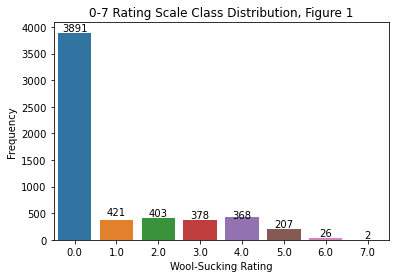

In [18]:
# proportion of categories 0-7 for Wool_sucking
class_dist_multi = cat_data.Wool_sucking.value_counts()

# Plotting the bar graph
ax = sns.barplot(x=class_dist_multi.index, y=class_dist_multi.values)

ax.set_title('0-7 Rating Scale Class Distribution, Figure 1')
ax.set_xlabel('Wool-Sucking Rating')
ax.set_ylabel('Frequency')


# Adding counts to the bars
for i, v in enumerate(class_dist_multi.values):
    ax.text(i, v, str(v), ha='center', va='bottom')

There is some serious class imbalance here that would make classifying into these 8 categories very difficult for data of this size. I mean, there are only 2 class 7 suckers. 

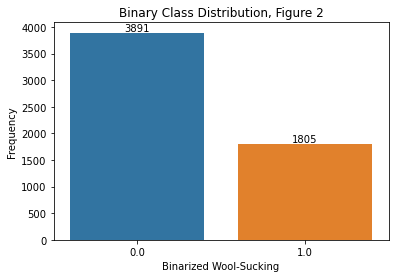

In [19]:
# proportion of categories 0-1 for binaries wool_sucking 
# binarize wool_sucking
cat_data['ws_binary'] = cat_data['Wool_sucking'].replace([1, 2, 3, 4, 5, 6, 7], [1, 1, 1, 1, 1, 1, 1])

class_dist_bin = cat_data.ws_binary.value_counts()

ax = sns.barplot(x=class_dist_bin.index, y=class_dist_bin.values)

ax.set_title('Binary Class Distribution, Figure 2')
ax.set_xlabel('Binarized Wool-Sucking')
ax.set_ylabel('Frequency')

for i, v in enumerate(class_dist_bin.values):
    ax.text(i, v, str(v), ha='center', va='bottom');

Still quite the imbalance, but much better than 2 or 26 samples/class. 

In [4]:
# I don't understand how 10% of cats were "not weaned", the questionnaire asks when was the cat separated from its mother?
# So, I am assuming the four year old cats that are 8's are not drinking breast milk still, rather, they just weren't separated 
# from mom ever. 
cat_data.Weaning_age.value_counts(normalize=True)

4    0.477001
5    0.176088
6    0.100948
8    0.100772
3    0.054600
2    0.038975
1    0.030723
7    0.020892
Name: Weaning_age, dtype: float64

In [5]:
WA_WS_crosstab = (pd.crosstab(cat_data.Weaning_age, cat_data.Wool_sucking))
new_cols = {0.0:'WS_0', 1.0:'WS_1', 2.0:"WS_2", 3.0:'WS_3', 4.0:'WS_4', 5.0:'WS_5', 6.0:'WS_6', 7.0:'WS_7'}
word_cols = {0.0:'never', 1.0:'1-3 times/lifetime', 2.0:'1-12 times/year', 3.0:'1-4 times/month', 4.0:'1-3 times/week', 5.0:'daily', 6.0:'many times/day', 7.0:'most of the day'}
WA_WS_crosstab = WA_WS_crosstab.rename(columns=new_cols)

In [6]:
WA_WS_crosstab

Wool_sucking,WS_0,WS_1,WS_2,WS_3,WS_4,WS_5,WS_6,WS_7
Weaning_age,,,,,,,,
1,98,18,11,12,22,11,3,0
2,130,11,22,21,24,12,2,0
3,194,16,30,22,34,15,0,0
4,1839,172,202,196,196,97,13,2
5,679,78,65,63,72,41,5,0
6,390,39,45,41,41,18,1,0
7,103,4,2,3,7,0,0,0
8,458,30,26,20,25,13,2,0


* Wool_sucking (0 = never, 1 = 1-3 times in the cat's lifetime, 2 = 1-12 times a year, 3 = 1-4 times a month, 4 = 1-3 times a week, 5 = daily, 6 = many times per day, 7 = most of the day)
* When was the cat separated from its mother?
  *  1 = before 8 weeks
  * 2 = at 8-9 weeks
  *  3 = at 10-11 weeks
  *  4 = at 12-13 weeks
  *  5 = at 14-15 weeks
  *  6 = at 16 weeks - 1 year
  *  7 = in adulthood
  *  8 = not weaned

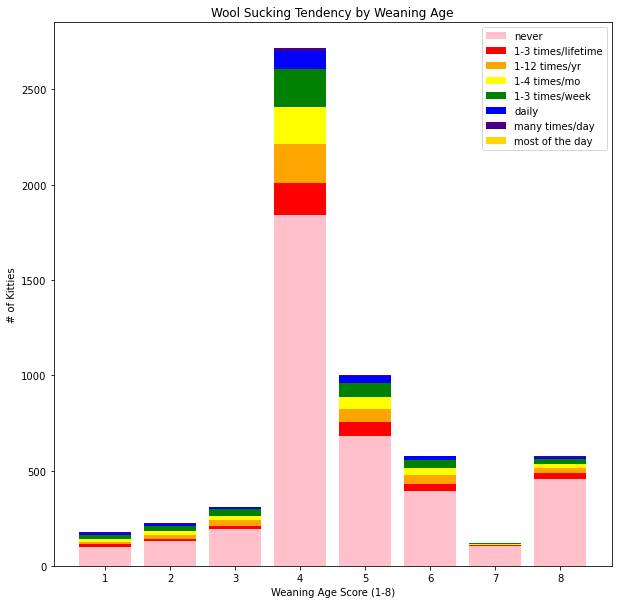

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.bar(WA_WS_crosstab.index, WA_WS_crosstab['WS_0'], 
       color="pink", label="never")
ax.bar(WA_WS_crosstab.index, WA_WS_crosstab['WS_1'], 
       bottom=WA_WS_crosstab['WS_0'],
       color="red", label="1-3 times/lifetime")
ax.bar(WA_WS_crosstab.index, WA_WS_crosstab['WS_2'], 
       bottom=WA_WS_crosstab['WS_0']+WA_WS_crosstab['WS_1'],
       color="orange", label="1-12 times/yr")
ax.bar(WA_WS_crosstab.index, WA_WS_crosstab['WS_3'], 
       bottom=WA_WS_crosstab['WS_0']+WA_WS_crosstab['WS_1']+WA_WS_crosstab['WS_2'],
       color="yellow", label="1-4 times/mo")
ax.bar(WA_WS_crosstab.index, WA_WS_crosstab['WS_4'], 
        bottom=WA_WS_crosstab['WS_0']+WA_WS_crosstab['WS_1']+WA_WS_crosstab['WS_2']+WA_WS_crosstab['WS_3'],
       color="green", label="1-3 times/week")
ax.bar(WA_WS_crosstab.index, WA_WS_crosstab['WS_5'], 
       bottom=WA_WS_crosstab['WS_0']+WA_WS_crosstab['WS_1']+WA_WS_crosstab['WS_2']+WA_WS_crosstab['WS_3']+WA_WS_crosstab['WS_4'],
       color="blue", label="daily")
ax.bar(WA_WS_crosstab.index, WA_WS_crosstab['WS_6'], 
       bottom=WA_WS_crosstab['WS_0']+WA_WS_crosstab['WS_1']+WA_WS_crosstab['WS_2']+WA_WS_crosstab['WS_3']+WA_WS_crosstab['WS_4']+WA_WS_crosstab['WS_5'],
       color="indigo", label="many times/day")
ax.bar(WA_WS_crosstab.index, WA_WS_crosstab['WS_7'], 
       bottom=WA_WS_crosstab['WS_0']+WA_WS_crosstab['WS_1']+WA_WS_crosstab['WS_2']+WA_WS_crosstab['WS_3']+WA_WS_crosstab['WS_4']+WA_WS_crosstab['WS_5']+WA_WS_crosstab['WS_6'],
       color="gold", label="most of the day")
ax.legend()
ax.set_xlabel('Weaning Age Score (1-8)')
ax.set_ylabel('# of Kitties')
plt.title('Wool Sucking Tendency by Weaning Age')
plt.show();

In [8]:
cat_data["Weaning_age"].value_counts(normalize=True)

4    0.477001
5    0.176088
6    0.100948
8    0.100772
3    0.054600
2    0.038975
1    0.030723
7    0.020892
Name: Weaning_age, dtype: float64

In [9]:
# Dropping weaning age score of 4  --- I'm sure there's a way to drop an index row but this way didn't require Googling!
tp = WA_WS_crosstab.T       # transpose
tp = tp.drop(columns=[4])   # drop 4
WA_WS_no4 = tp.T            # transpose back  
WA_WS_no4

Wool_sucking,WS_0,WS_1,WS_2,WS_3,WS_4,WS_5,WS_6,WS_7
Weaning_age,,,,,,,,
1,98,18,11,12,22,11,3,0
2,130,11,22,21,24,12,2,0
3,194,16,30,22,34,15,0,0
5,679,78,65,63,72,41,5,0
6,390,39,45,41,41,18,1,0
7,103,4,2,3,7,0,0,0
8,458,30,26,20,25,13,2,0


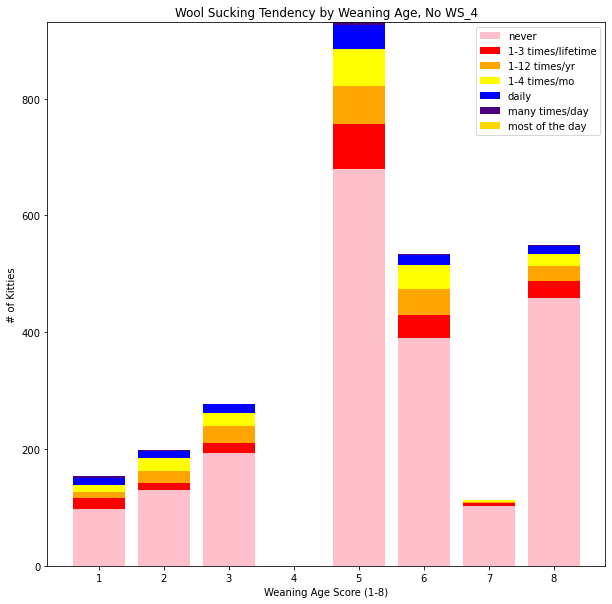

In [10]:
# I wanted to be able to see these on a better scale 
fig2, ax2 = plt.subplots(figsize=(10, 10))
ax2.bar(WA_WS_no4.index, WA_WS_no4['WS_0'], 
       color="pink", label="never")
ax2.bar(WA_WS_no4.index, WA_WS_no4['WS_1'], 
       bottom=WA_WS_no4['WS_0'],
       color="red", label="1-3 times/lifetime")
ax2.bar(WA_WS_no4.index, WA_WS_no4['WS_2'], 
       bottom=WA_WS_no4['WS_0']+WA_WS_no4['WS_1'],
       color="orange", label="1-12 times/yr")
ax2.bar(WA_WS_no4.index, WA_WS_no4['WS_3'], 
       bottom=WA_WS_no4['WS_0']+WA_WS_no4['WS_1']+WA_WS_no4['WS_2'],
       color="yellow", label="1-4 times/mo")
ax2.bar(WA_WS_no4.index, WA_WS_no4['WS_5'], 
       bottom=WA_WS_no4['WS_0']+WA_WS_no4['WS_1']+WA_WS_no4['WS_2']+WA_WS_no4['WS_3'],
       color="blue", label="daily")
ax2.bar(WA_WS_no4.index, WA_WS_no4['WS_6'], 
       bottom=WA_WS_no4['WS_0']+WA_WS_no4['WS_1']+WA_WS_no4['WS_2']+WA_WS_no4['WS_3']+WA_WS_no4['WS_5'],
       color="indigo", label="many times/day")
ax2.bar(WA_WS_no4.index, WA_WS_no4['WS_7'], 
       bottom=WA_WS_no4['WS_0']+WA_WS_no4['WS_1']+WA_WS_no4['WS_2']+WA_WS_no4['WS_3']+WA_WS_no4['WS_5']+WA_WS_no4['WS_6'],
       color="gold", label="most of the day")
ax2.legend()
ax2.set_xlabel('Weaning Age Score (1-8)')
ax2.set_ylabel('# of Kitties')
ax2.set_title('Wool Sucking Tendency by Weaning Age, No WS_4')
plt.show();

In [11]:
stat, p, dof, expected = stats.chi2_contingency(WA_WS_crosstab)

In [12]:
# just double-checking the result we got from the heat map. 
p = round(p, 5)
p

0.0

## Rejecting the Null:
* Null Hypothesis: Weaning age and wool sucking are independent variables. They are not correlated. 
* **Alt Hypothesis: Weaning age and wool sucking are correlated.**

P-Value = 0.0, i.e., we would not expect to see this relationship due to unavoidable and natural variability. We should reject the null hypothesis. 

# Neuter Status - Grouped Bar

In [13]:
# Neuter Status Cont. Table
ns = pd.crosstab(cat_data.Neuter_status, cat_data.Wool_sucking)
ns = ns.rename(columns=word_cols)
xns = ns.index

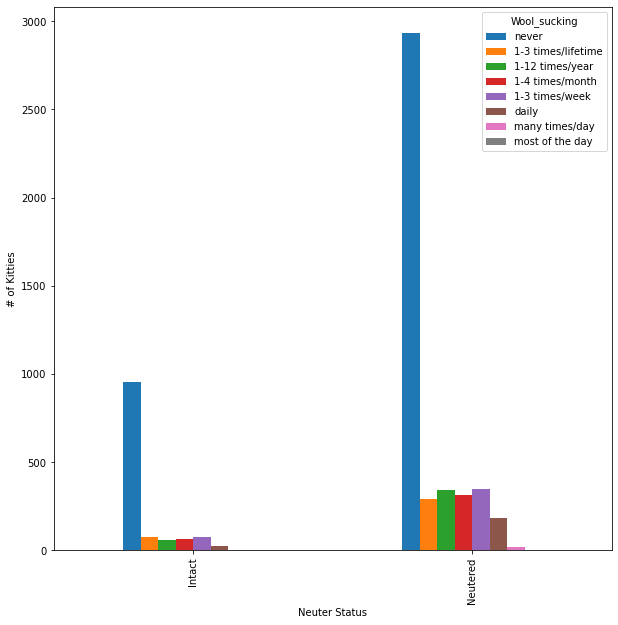

In [14]:
# Netuer Status Grouped Bar
ns.plot(kind='bar', figsize=(10,10))
plt.xlabel('Neuter Status')
plt.xticks(xns, ['Intact', 'Neutered'])
plt.ylabel('# of Kitties');

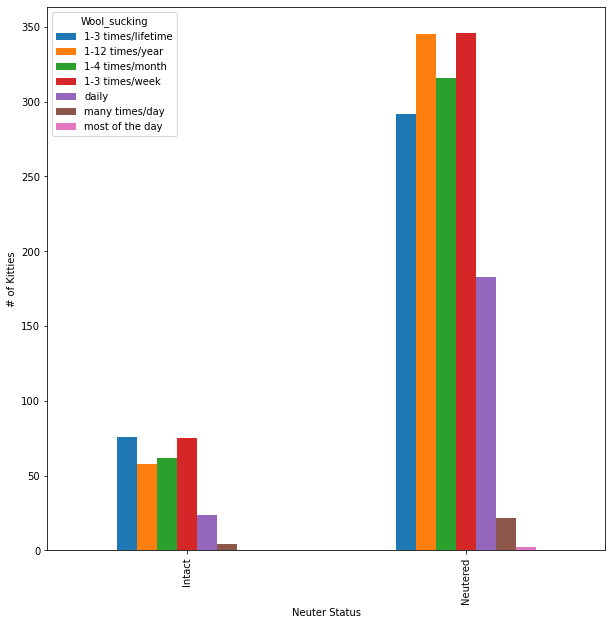

In [15]:
# Better Scale, No 'never' responses to WS 
ns_nows0 = ns.drop(columns='never')
ns_nows0.plot(kind='bar', figsize=(10,10))
plt.xlabel('Neuter Status')
plt.xticks(xns, ['Intact', 'Neutered'])
plt.ylabel('# of Kitties');

In [16]:
# How many intact vs neutered?
cat_data.Neuter_status.value_counts()

1    4441
0    1255
Name: Neuter_status, dtype: int64

In [17]:
# Proportions of WS scores for Intact Cats
i = cat_data.loc[(cat_data['Neuter_status'] == 0), 'Wool_sucking'].value_counts(normalize=True)

In [18]:
# Proportions of WS scores for Neutered Cats
n = cat_data.loc[(cat_data['Neuter_status'] == 1), 'Wool_sucking'].value_counts(normalize=True)

# Observations:
The difference between neutered and intact kitties seems great, but there are also like 3x neutered cats than intact. The distribution of scores is fairly similar:

          never  1-3 times/lifetime  1-12 times/year  1-4 times/month  \
intact    0.762               0.254            0.194            0.207   
neutered  0.661               0.194            0.230            0.210   

          1-3 times/week  daily  many times/day  most of the day  
intact             0.251  0.080           0.013            0.000  
neutered           0.230  0.122           0.015            0.001  


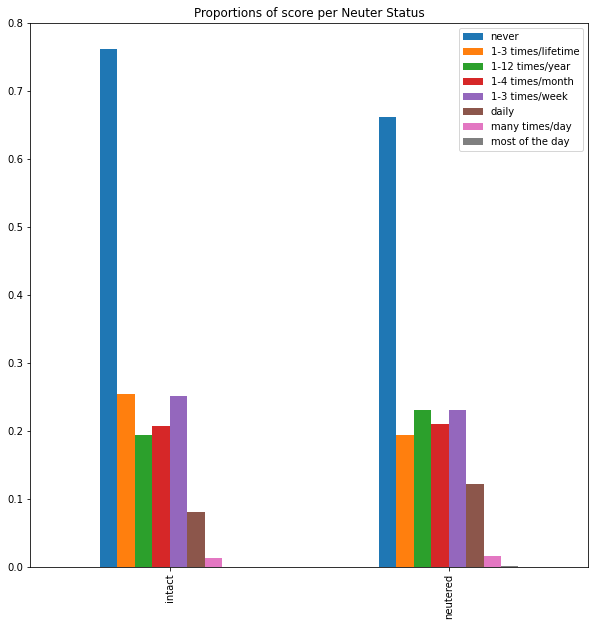

In [19]:
df = pd.DataFrame({0:[0.762, 0.661],1:[0.254, 0.194], 2:[0.194, 0.230], 3:[0.207, 0.210], 4:[0.251, 0.230], 5:[0.080, 0.122], 6:[0.013, 0.015], 7:[0, 0.001]})
df.rename(index={0:'intact', 1:'neutered'}, inplace=True)
df.rename(columns=word_cols, inplace=True)
df.plot(kind='bar', figsize=(10, 10))
print(df)
plt.title('Proportions of score per Neuter Status');

# Breed Group - Grouped Bar

In [20]:
# Breed Group Contingency Tab 
bg = pd.crosstab(cat_data.Breed_group, cat_data.Wool_sucking)
bg = bg.rename(columns=new_cols)
xbg = bg.index

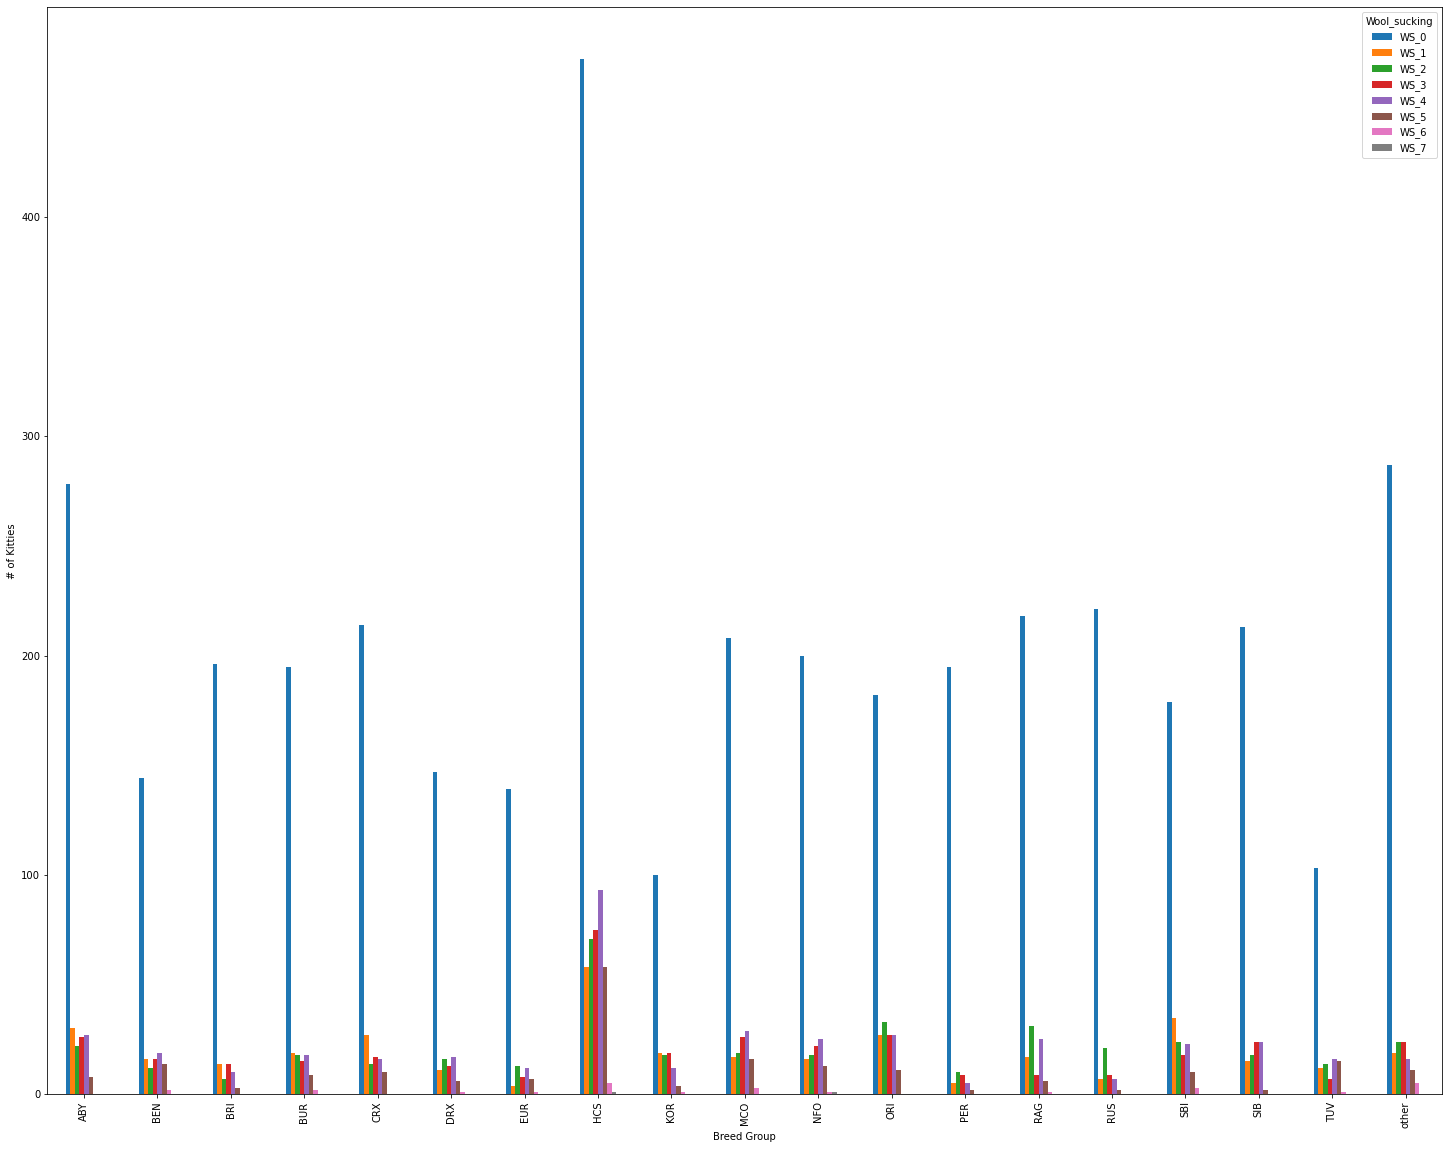

In [21]:
# Breed Group Plot 
bg.plot(kind='bar', figsize=(25,20))
plt.xlabel('Breed Group')
plt.ylabel('# of Kitties');

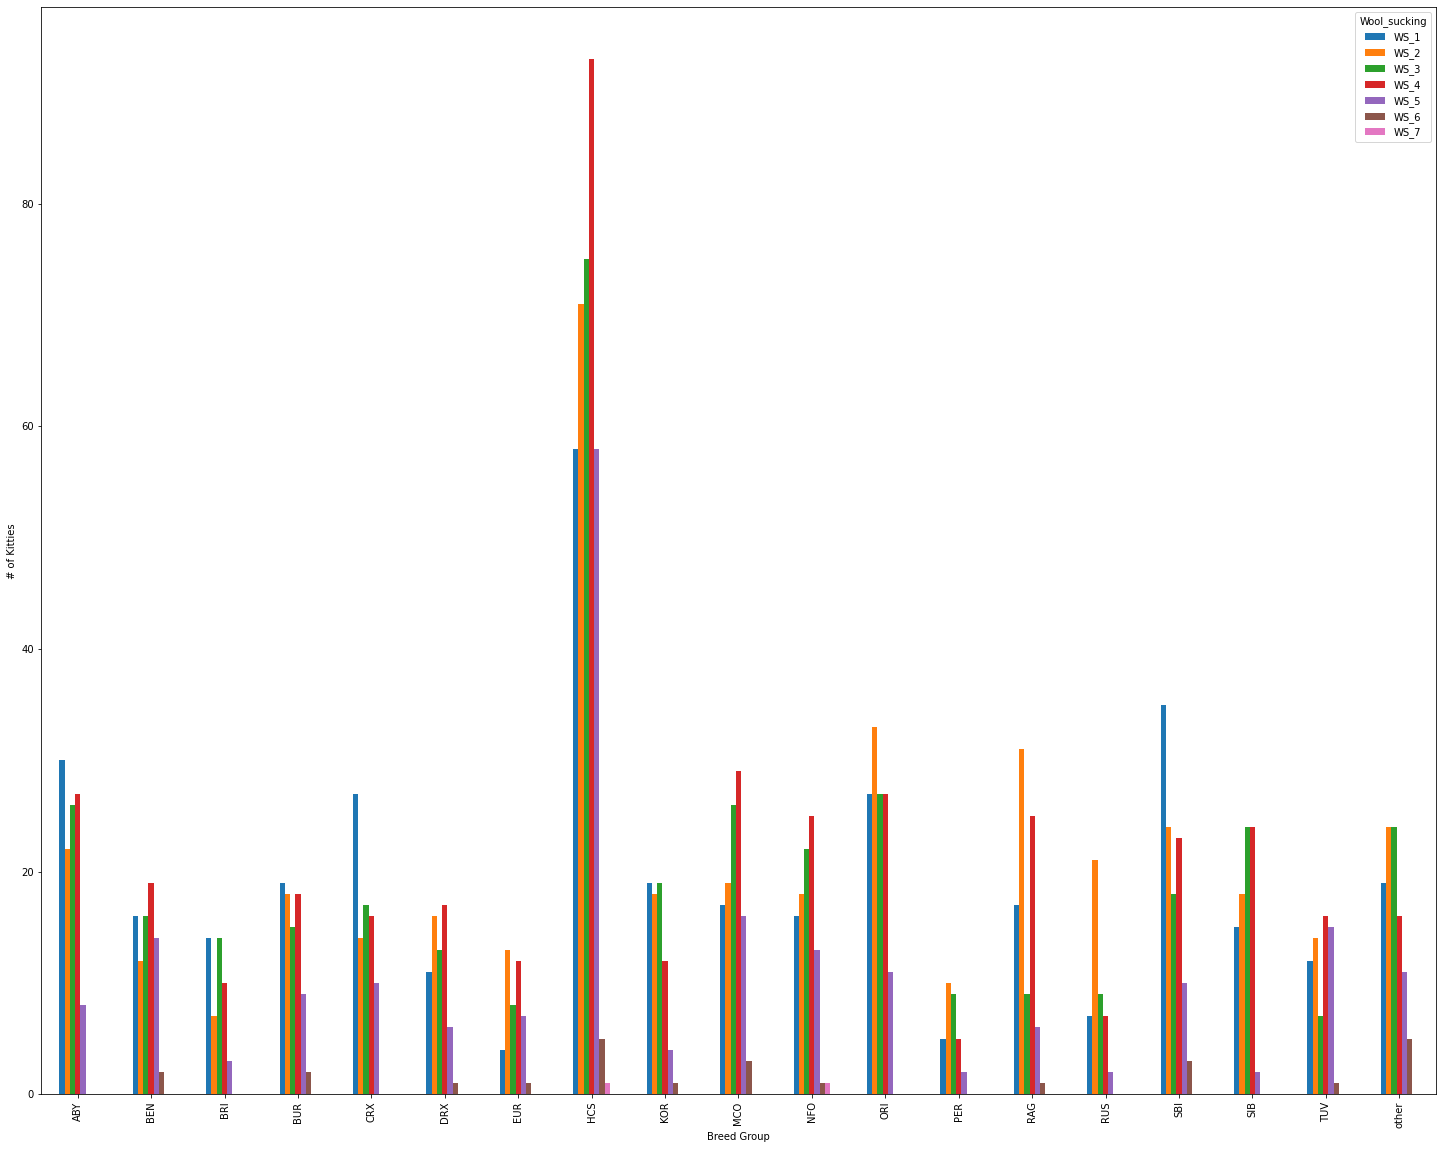

In [22]:
# No 'never' WS responses for BG
bg_nows0 = bg.drop(columns='WS_0')
bg_nows0.plot(kind='bar', figsize=(25,20))
plt.xlabel('Breed Group')
plt.ylabel('# of Kitties');

In [23]:
# Splitting breeds into groups so I can actually see what the heck is going on here 
g1 = cat_data.loc[cat_data['Breed_group'].isin(['ABY', 'BEN', 'BRI', 'BUR', 'CRX', 'DRX']), ['Breed_group', 'Wool_sucking']]
g2 = cat_data.loc[cat_data['Breed_group'].isin(['EUR', 'HCS', 'KOR', 'MCO', 'NFO', 'ORI']), ['Breed_group', 'Wool_sucking']]
g3 = cat_data.loc[cat_data['Breed_group'].isin(['PER', 'RAG', 'RUS', 'SBI', 'SIB', 'TUV', 'other']), ['Breed_group', 'Wool_sucking']]

In [24]:
g1 = pd.crosstab(g1.Breed_group, g1.Wool_sucking)
g2 = pd.crosstab(g2.Breed_group, g2.Wool_sucking)
g3 = pd.crosstab(g3.Breed_group, g3.Wool_sucking)

In [25]:
g1 = g1.rename(columns=word_cols)
g2 = g2.rename(columns=word_cols)
g3 = g3.rename(columns=word_cols)

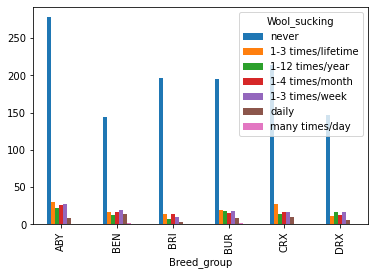

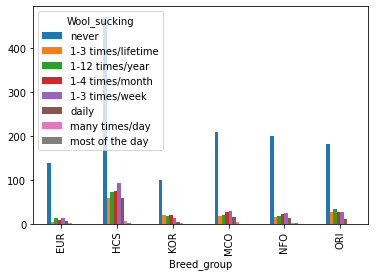

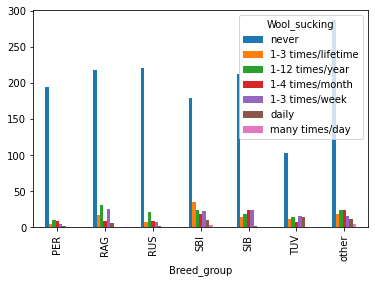

In [26]:
g1.plot(kind='bar')
g2.plot(kind='bar')
g3.plot(kind='bar');

In [27]:
# For better scale
g1 = g1.drop(columns='never')
g2 = g2.drop(columns='never')
g3 = g3.drop(columns='never')

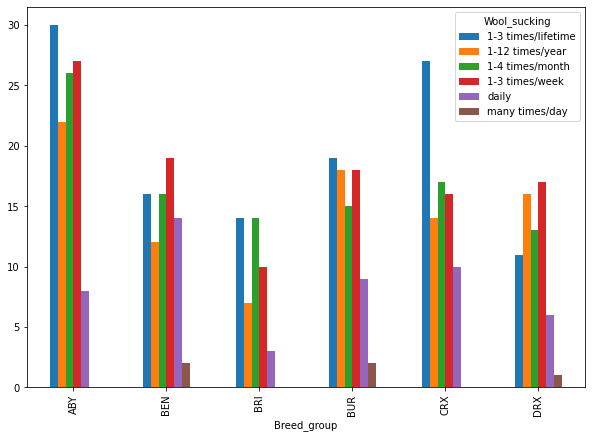

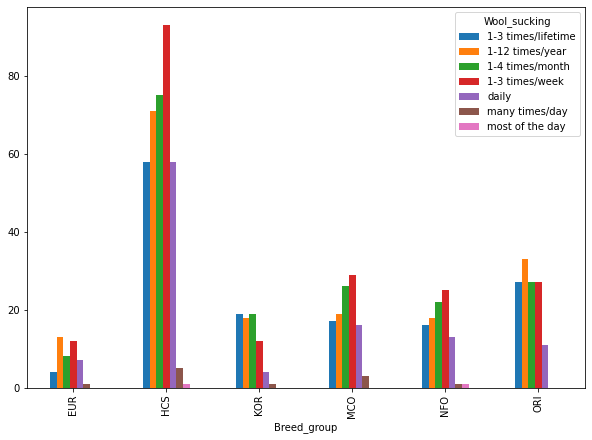

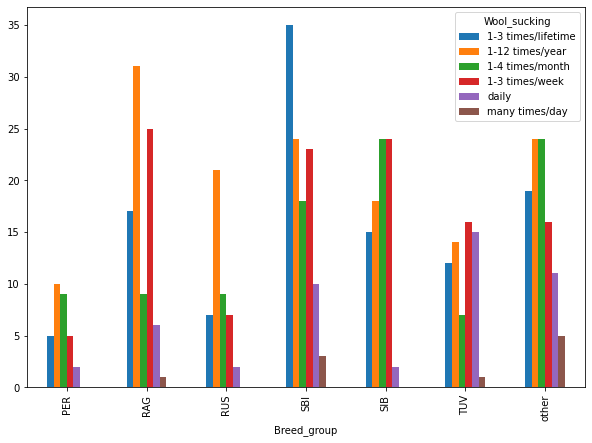

In [28]:
g1.plot(kind='bar', figsize=(10,7))
g2.plot(kind='bar', figsize=(10,7))
g3.plot(kind='bar', figsize=(10,7));

In [29]:
stat, p, dof, expected = stats.chi2_contingency(bg)
round(p, 5)

0.0

In [30]:
cat_data.head()

,Age,Gender,Neuter_status,Breed_group,Weaning_age,Outdoors,Other_cats,Activity_level,Contact_people,Aggression_stranger,Aggression_owner,Aggression_cats,Shyness_novel,Shyness_strangers,Grooming,Wool_sucking,Behaviour_problem
0,4.0274,2,1,BEN,8,0,1,4,5,1,1,1,2,1,1.0,0.0,1.0
1,2.1096,2,1,BEN,8,0,1,5,4,1,1,1,3,3,1.0,0.0,1.0
2,7.6822,1,1,BUR,4,0,1,4,5,1,1,1,2,1,4.0,3.0,2.0
3,5.0027,1,1,BUR,4,4,0,5,5,1,1,2,1,1,1.0,0.0,1.0
4,5.0137,1,1,EUR,4,5,1,4,5,1,1,1,2,1,1.0,0.0,1.0


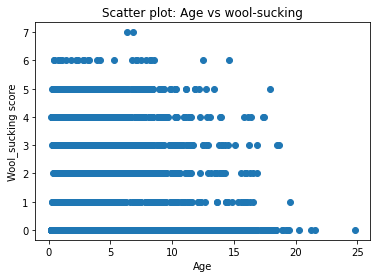

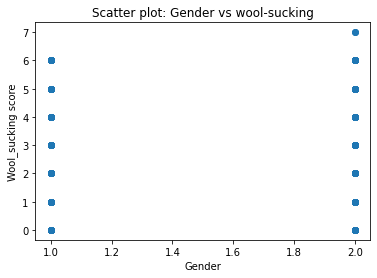

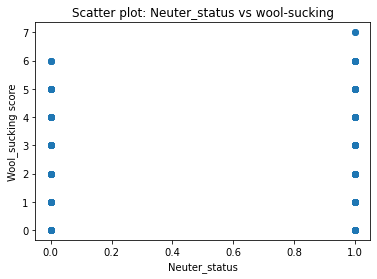

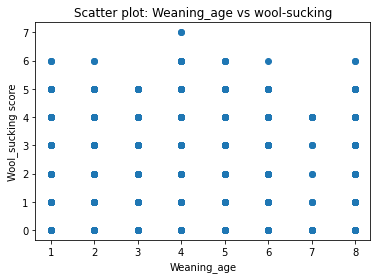

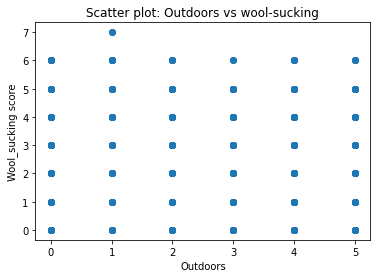

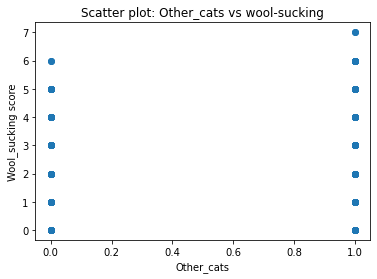

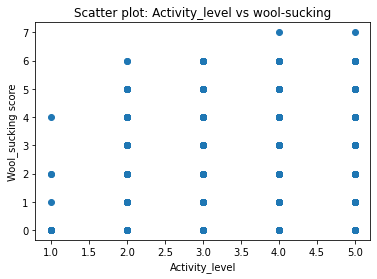

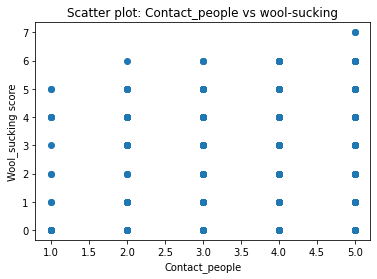

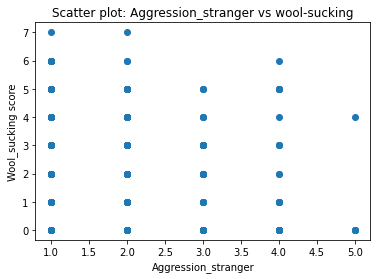

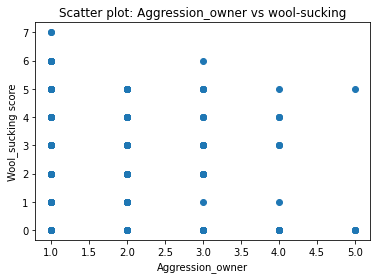

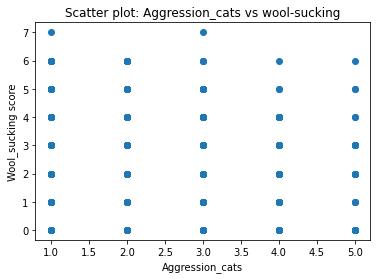

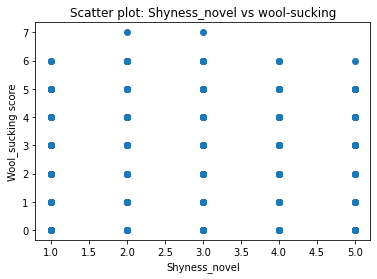

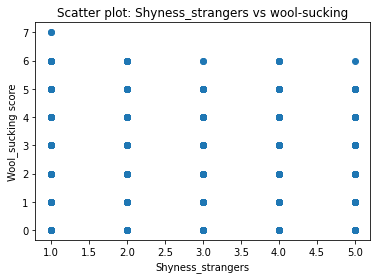

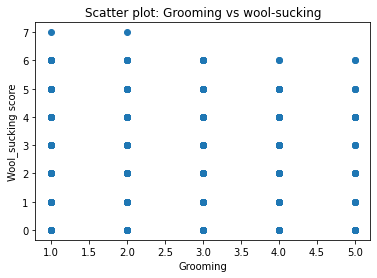

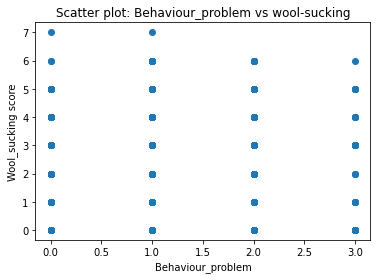

In [34]:
# scatter plots of wool-sucking against everything but breed (since I haven't encoded that yet)
variables_to_compare = cat_data.drop(columns=['Wool_sucking', 'Breed_group']).columns

for variable in variables_to_compare:
    plt.scatter(cat_data[variable], cat_data['Wool_sucking'])
    plt.xlabel(variable)
    plt.ylabel('Wool_sucking score')
    plt.title(f'Scatter plot: {variable} vs wool-sucking')
    plt.show()

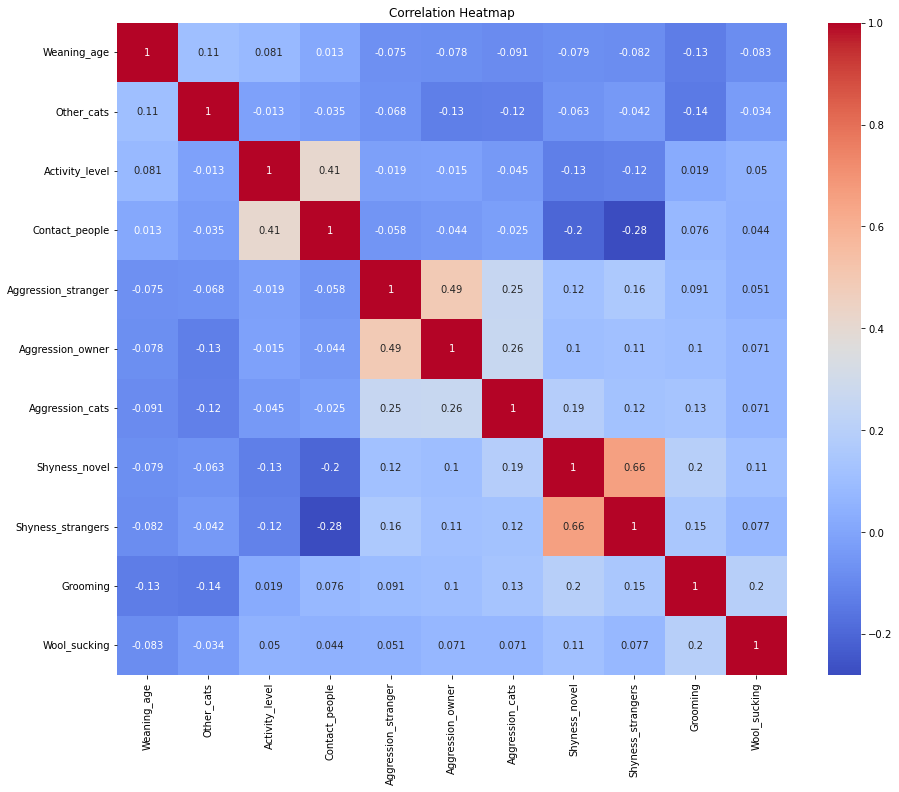

In [36]:
# dropping non-ordinal columns 
vars = cat_data.drop(columns=['Age', 'Gender', 'Neuter_status', 'Behaviour_problem', 'Outdoors']).columns

corr_matrix = cat_data[vars].corr(method='kendall') # apparently kendall is the man for ordinal data
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Wool sucking is most strongly coordinated (0.2>c>0.07, which isn't saying much) with (+)Grooming, (+)shyness to novel situations, (-) weaning age (makes sense, the stronger the wool sucking score the earlier they were weaned), (+) shyness with strangers, and (+) aggression to owner and cats. Considering this data was taken from a study on behaviors among breed groups, I'm excited to do some more exploration with that. I think at this point, I just want to start modelling and see what the most important features are for the models because I think ordinal data is a bit difficult to get a good visualization on these ordinal points. 